In [1]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt
from astropy.table import Table
import StellarConfig as strConfig

In [2]:
colorDir = strConfig.stellarDir + "BalrogColorMagTest/"
balrogFile = colorDir + "Balrog_Star_Color_Mag.fits"
goldFile = colorDir + "Gold_Star_Color_Mag.fits"

In [3]:
matBalrStarFile = strConfig.matBalrStarFile
detBalrStarFile = strConfig.detBalrStarFile

classCutoff = strConfig.classCutoff
gCut = strConfig.gCut

goldObjectsFiles = strConfig.goldObjectsFiles
goldObjectsDir = strConfig.goldObjectsDir

In [4]:
# # This reads in all of the data. Most of these are just flags, but the g magnitude, ra, dec, detected
# # flag, and others will be stored for later use.
# starData = fitsio.read(detBalrStarFile, columns = ['bal_id', 'flags_foreground', 'flags_badregions', 
#                                             'flags_footprint', 'match_flag_1.5_asec'])
# FOREGROUND = starData['flags_foreground']
# BADREGIONS = starData['flags_badregions']
# FOOTPRINT = starData['flags_footprint']
# ARCSECONDS = starData['match_flag_1.5_asec']

# qualityCut = np.where((FOREGROUND == 0) & 
#                       (BADREGIONS < 2) & 
#                       (FOOTPRINT == 1) & 
#                       (ARCSECONDS < 2))[0]

# measStarData = fitsio.read(matBalrStarFile, columns = ['meas_psf_mag', 'bal_id'])

# # PSF Magnitudes
# GMAG_PSF = measStarData['meas_psf_mag'][:,0]
# RMAG_PSF = measStarData['meas_psf_mag'][:,1]
# IMAG_PSF = measStarData['meas_psf_mag'][:,2]
# # This is the ID from the measured catalog.
# MEAS_ID  = measStarData['bal_id']

# sortInds = MEAS_ID.argsort()
# MEAS_ID = MEAS_ID[sortInds[::1]]
# GMAG_PSF = GMAG_PSF[sortInds[::1]]
# RMAG_PSF = RMAG_PSF[sortInds[::1]]
# IMAG_PSF = IMAG_PSF[sortInds[::1]]

# # Everything from here on out is simply used in order to filter the data
# FLAG_ID = starData['bal_id']

# sortInds = FLAG_ID.argsort()
# FLAG_ID = FLAG_ID[sortInds[::1]]
# FOREGROUND = FOREGROUND[sortInds[::1]]
# BADREGIONS = BADREGIONS[sortInds[::1]]
# FOOTPRINT = FOOTPRINT[sortInds[::1]]
# ARCSECONDS = ARCSECONDS[sortInds[::1]]

# cropInds = np.isin(FLAG_ID, MEAS_ID)

# FOREGROUND = FOREGROUND[cropInds]
# BADREGIONS = BADREGIONS[cropInds]
# FOOTPRINT = FOOTPRINT[cropInds]
# ARCSECONDS = ARCSECONDS[cropInds]

# # This is used to filter out any injections that had flags raised.
# cutIndices = np.where((FOREGROUND == 0) & 
#                       (BADREGIONS < 2) & 
#                       (FOOTPRINT == 1) & 
#                       (ARCSECONDS < 2) &
#                       # Isochrone cuts
#                       (GMAG_PSF < gCut))[0]

# # This reduced the data down to the actually valid pixels.
# GMAG_PSF = GMAG_PSF[cutIndices]
# RMAG_PSF = RMAG_PSF[cutIndices]
# IMAG_PSF = IMAG_PSF[cutIndices]

# my_table = Table()
# my_table['GMAG'] = GMAG_PSF
# my_table['RMAG'] = RMAG_PSF
# my_table['IMAG'] = IMAG_PSF
# my_table.write(balrogFile, overwrite = True)

In [5]:
# goldCols = ['FLAGS_FOREGROUND', 'FLAGS_BADREGIONS', 'FLAGS_FOOTPRINT', 'EXTENDED_CLASS_SOF', 'SOF_PSF_MAG_G', 'SOF_PSF_MAG_R', 'SOF_PSF_MAG_I']

In [6]:
# StarGMAG = []
# StarRMAG = []
# StarIMAG = []
    
# for j in range(len(goldObjectsFiles)):
#     if j%100 == 0:
#         print(j)
#     obsData = fitsio.read(goldObjectsDir + goldObjectsFiles[j], columns = goldCols)
#     FOREGROUND = obsData[goldCols[0]]
#     BADREGIONS = obsData[goldCols[1]]
#     FOOTPRINT = obsData[goldCols[2]]
#     CLASS = obsData[goldCols[3]]
#     GMAG = obsData[goldCols[4]]
#     RMAG = obsData[goldCols[5]]
#     IMAG = obsData[goldCols[6]]

#     # General Quality Cuts
#     qualityCut = np.where((FOREGROUND == 0) &
#                           (BADREGIONS < 2) &
#                           (FOOTPRINT == 1) &
#                           (CLASS >= 0) &
#                           (CLASS <= classCutoff))[0]

#     GMAG = GMAG[qualityCut]
#     RMAG = RMAG[qualityCut]
#     IMAG = IMAG[qualityCut]
    
#     maxMagCut = np.where(GMAG < gCut)[0]
    
#     GMAG = GMAG[maxMagCut]
#     RMAG = RMAG[maxMagCut]
#     IMAG = IMAG[maxMagCut]
    
#     StarGMAG = np.append(StarGMAG, GMAG)
#     StarRMAG = np.append(StarRMAG, RMAG)
#     StarIMAG = np.append(StarIMAG, IMAG)

# my_table = Table()
# my_table['GMAG'] = StarGMAG.astype(float)
# my_table['RMAG'] = StarRMAG.astype(float)
# my_table['IMAG'] = StarIMAG.astype(float)
# my_table.write(goldFile, overwrite = True)

In [7]:
balrogData = fitsio.read(balrogFile)
goldData = fitsio.read(goldFile)

In [8]:
mag = 'R'
color = 'G'
magMinusColor = False

balrogMag = balrogData[mag + 'MAG']
balrogColor = ((-1)**magMinusColor) * (balrogData[color + 'MAG'] - balrogMag)

goldMag = goldData[mag + 'MAG']
goldColor = ((-1)**magMinusColor) * (goldData[color + 'MAG'] - goldMag)

magCut = [20, 21]

balrogColor = balrogColor[np.where((balrogMag >= magCut[0]) & (balrogMag <= magCut[1]))[0]]
balrogMag = balrogMag[np.where((balrogMag >= magCut[0]) & (balrogMag <= magCut[1]))[0]]

goldColor = goldColor[np.where((goldMag >= magCut[0]) & (goldMag <= magCut[1]))[0]]
goldMag = goldMag[np.where((goldMag >= magCut[0]) & (goldMag <= magCut[1]))[0]]

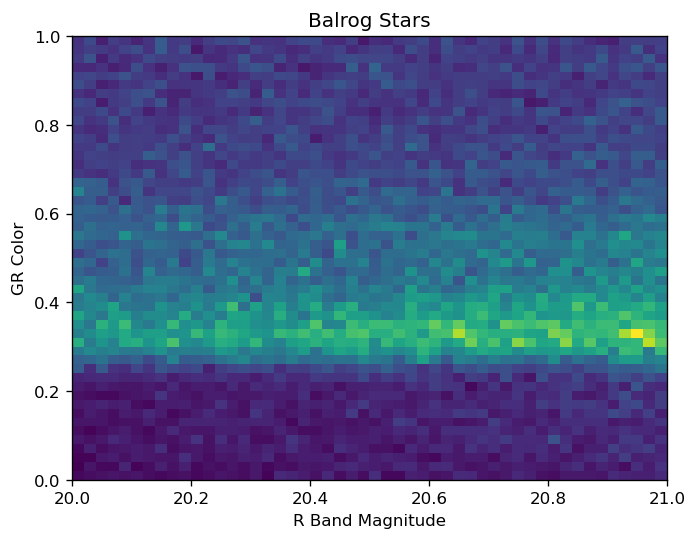

In [15]:
plt.figure(dpi = 120)
binsBalr = plt.hist2d(balrogMag, balrogColor, bins = (np.linspace(magCut[0], magCut[1], 51), np.linspace(0, 1, 51)), density = True)
plt.title('Balrog Stars')
plt.xlabel('R Band Magnitude')
plt.ylabel('GR Color')
plt.show()

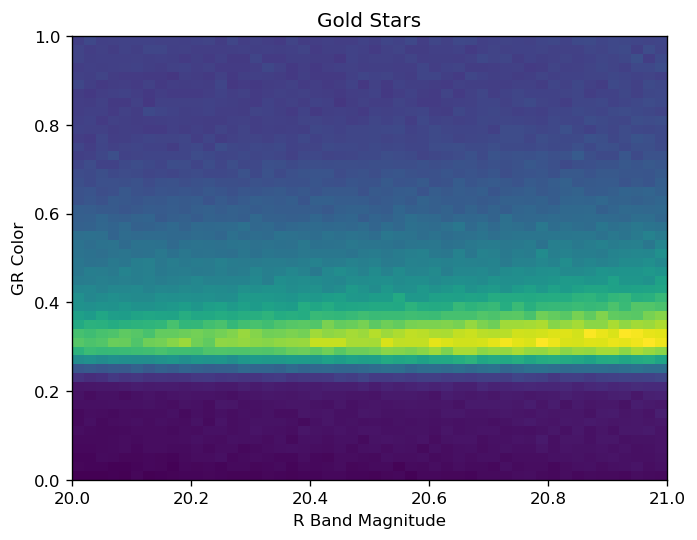

In [16]:
plt.figure(dpi = 120)
binsGold = plt.hist2d(goldMag, goldColor, bins = (binsBalr[1], binsBalr[2]), density = True)
plt.title('Gold Stars')
plt.xlabel('R Band Magnitude')
plt.ylabel('GR Color')
plt.show()

In [11]:
diffWeights = (binsGold[0] - binsBalr[0])

In [12]:
histPos = np.meshgrid(binsBalr[1][:-1], binsBalr[2][:-1])

In [13]:
xHistPos = histPos[0]
xHistPos = xHistPos.flatten('F') + ((binsBalr[1][1] - binsBalr[1][0]) / 2)

yHistPos = histPos[1]
yHistPos = yHistPos.flatten('F') + ((binsBalr[2][1] - binsBalr[2][0]) / 2)

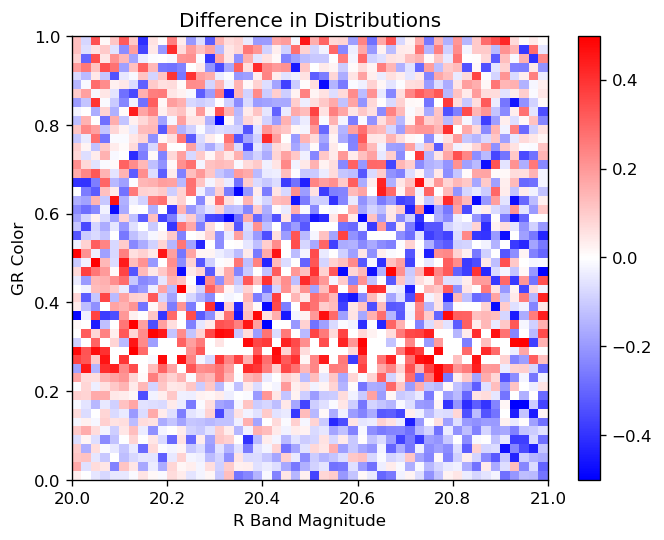

In [17]:
plt.figure(dpi = 120)
binsGold = plt.hist2d(xHistPos, yHistPos, bins = (binsBalr[1], binsBalr[2]), cmin = -0.5, cmax = 0.5, cmap = 'bwr', weights = diffWeights.flatten())
plt.title('Difference in Distributions')
plt.xlabel('R Band Magnitude')
plt.ylabel('GR Color')
plt.colorbar()
plt.show()